<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [175]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [176]:
# Answer:

movies.shape

(979, 6)

#### Check the data type of each column.

In [177]:
# Answer:

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [178]:
# Answer:

movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [179]:
# Answer:

movies.sort_values('duration')

# shortest is Freaks at 64 minutes
# longest is Halmet at 242 minutes

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
742,7.6,Following,R,Mystery,69,"[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russe..."
351,8.0,Frankenstein,UNRATED,Horror,70,"[u'Colin Clive', u'Mae Clarke', u'Boris Karloff']"
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
405,7.9,The Bride of Frankenstein,NOT RATED,Horror,75,"[u'Boris Karloff', u'Elsa Lanchester', u'Colin..."
303,8.0,The Nightmare Before Christmas,PG,Animation,76,"[u'Danny Elfman', u'Chris Sarandon', u""Catheri..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

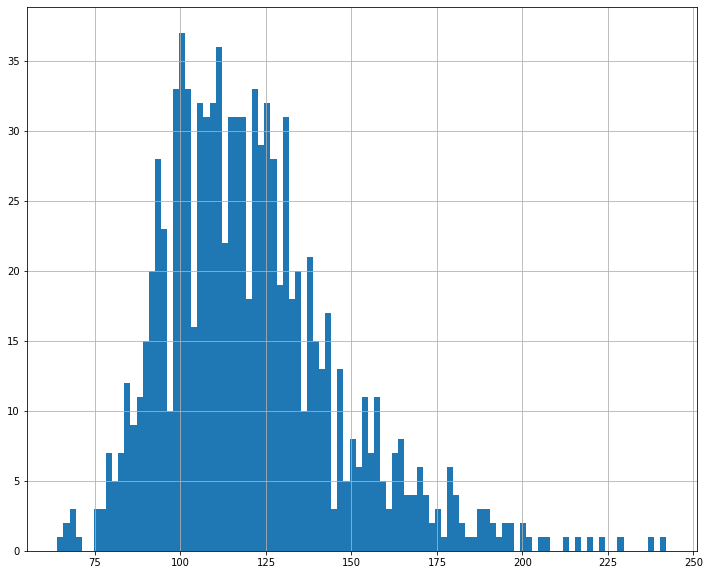

In [180]:
# Answer:

movies.duration.hist(figsize=(12, 10), bins=100);

#### Use a box plot to display that same data.

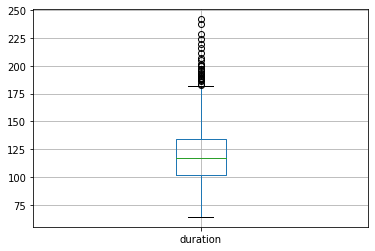

In [181]:
# Answer:

movies.boxplot(column='duration');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [182]:
# Answer:

movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0.5, 1.0, 'Number of Movies by Content Rating')

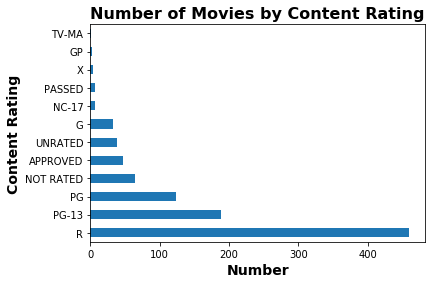

In [183]:
# Answer:

movies.content_rating.value_counts().plot(kind='barh');

plt.xlabel('Number', fontsize=14, fontweight='bold')
plt.ylabel('Content Rating', fontsize=14, fontweight='bold')
plt.title('Number of Movies by Content Rating', fontsize=16, fontweight='bold')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [184]:
# Answer:

movies['content_rating'] = movies['content_rating'].str.replace('NOT RATED','UNRATED')
movies['content_rating'] = movies['content_rating'].str.replace('APPROVED','UNRATED')
movies['content_rating'] = movies['content_rating'].str.replace('PASSED','UNRATED')
movies['content_rating'] = movies['content_rating'].str.replace('GP','UNRATED')
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [185]:
# Answer:

movies['content_rating'] = movies['content_rating'].str.replace('X','NC-17')
movies['content_rating'] = movies['content_rating'].str.replace('TV-MA','NC-17')
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [186]:
# Answer:

movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [187]:
# Answer:

movies['content_rating'].fillna('UNRATED', inplace=True)
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [188]:
# Answer:

movies_120 = movies.query('duration>119')
movies_119 = movies.query('duration<120')


print(movies_120.star_rating.mean()-movies_119.star_rating.mean())

0.11023201174742514


#### Use a visualization to detect whether there is a relationship between duration and star rating.

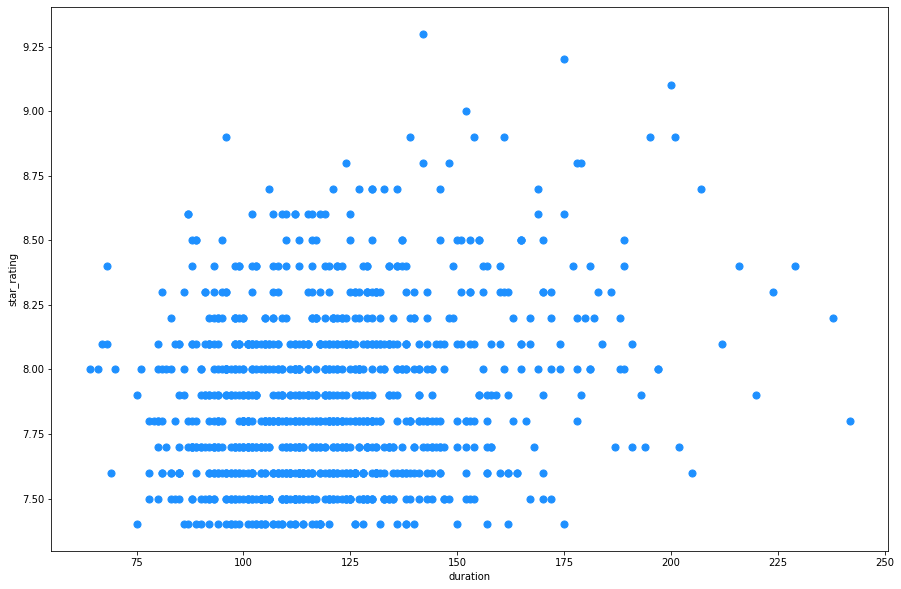

In [189]:
# Answer:

movies.plot(x='duration', y='star_rating', kind='scatter', 
           color='dodgerblue', figsize=(15,10), s=50);

# no meaningful relationship?

#### Calculate the average duration for each genre.

In [190]:
# Answer:

movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

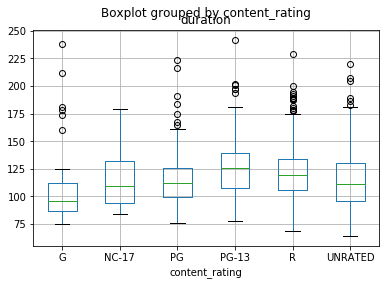

In [192]:
# Answer:

movies.boxplot(column='duration', by='content_rating')

#### Determine the top rated movie (by star rating) for each genre.

In [193]:
# Answer:

movies.sort_values('star_rating', ascending=False).groupby('genre').title.first()

genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                        Modern Times
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [202]:
# Answer:

movies[movies.title.duplicated()] 


,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [206]:
# Answer:

genres_10 = movies.genre.value_counts()[movies.genre.value_counts() >= 10].index
movies[movies.genre.isin(genres_10)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!

In [225]:
# Answer:

movies['actors_list'].value_counts()

# most times a group of actors acted together

[u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']                          6
[u'Mark Hamill', u'Harrison Ford', u'Carrie Fisher']                            3
[u'Michael J. Fox', u'Christopher Lloyd', u'Lea Thompson']                      2
[u'Ian McKellen', u'Martin Freeman', u'Richard Armitage']                       2
[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']                                    2
[u'Martin Sheen', u'Sissy Spacek', u'Warren Oates']                             1
[u'Sh\xfbichir\xf4 Moriyama', u'Tokiko Kat\xf4', u'Sanshi Katsura']             1
[u'Cary Elwes', u'Leigh Whannell', u'Danny Glover']                             1
[u'Willem Dafoe', u'Harvey Keitel', u'Barbara Hershey']                         1
[u'Guillaume Canet', u'Marion Cotillard', u'Thibault Verhaeghe']                1
[u'Robert Hays', u'Julie Hagerty', u'Leslie Nielsen']                           1
[u'Henry Fonda', u'Jane Darwell', u'John Carradine']                            1
[u'Susanne Lotha

In [226]:
movies['actors_list'].apply(pd.Series)

# not able to split list in a list

,0
0,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
